error in line 9
invalid data: 
error in line 19
invalid data: 
error in line 29
invalid data: 
error in line 39
invalid data: 
error in line 49
invalid data: 
error in line 59
invalid data: 
error in line 69
invalid data: 
error in line 79
invalid data: 
error in line 89
invalid data: 
error in line 99
invalid data: 
error in line 109
invalid data: 
error in line 119
invalid data: 
error in line 129
invalid data: 
error in line 139
invalid data: 
error in line 149
invalid data: 
error in line 159
invalid data: 
error in line 169
invalid data: 
error in line 179
invalid data: 
error in line 189
invalid data: 
error in line 199
invalid data: 
error in line 209
invalid data: 
error in line 219
invalid data: 
error in line 229
invalid data: 
error in line 240
invalid data: 
error in line 251
invalid data: 
error in line 261
invalid data: 
error in line 271
invalid data: 
error in line 282
invalid data: 
error in line 292
invalid data: 
error in line 302
invalid data: 
error in line 312
inv

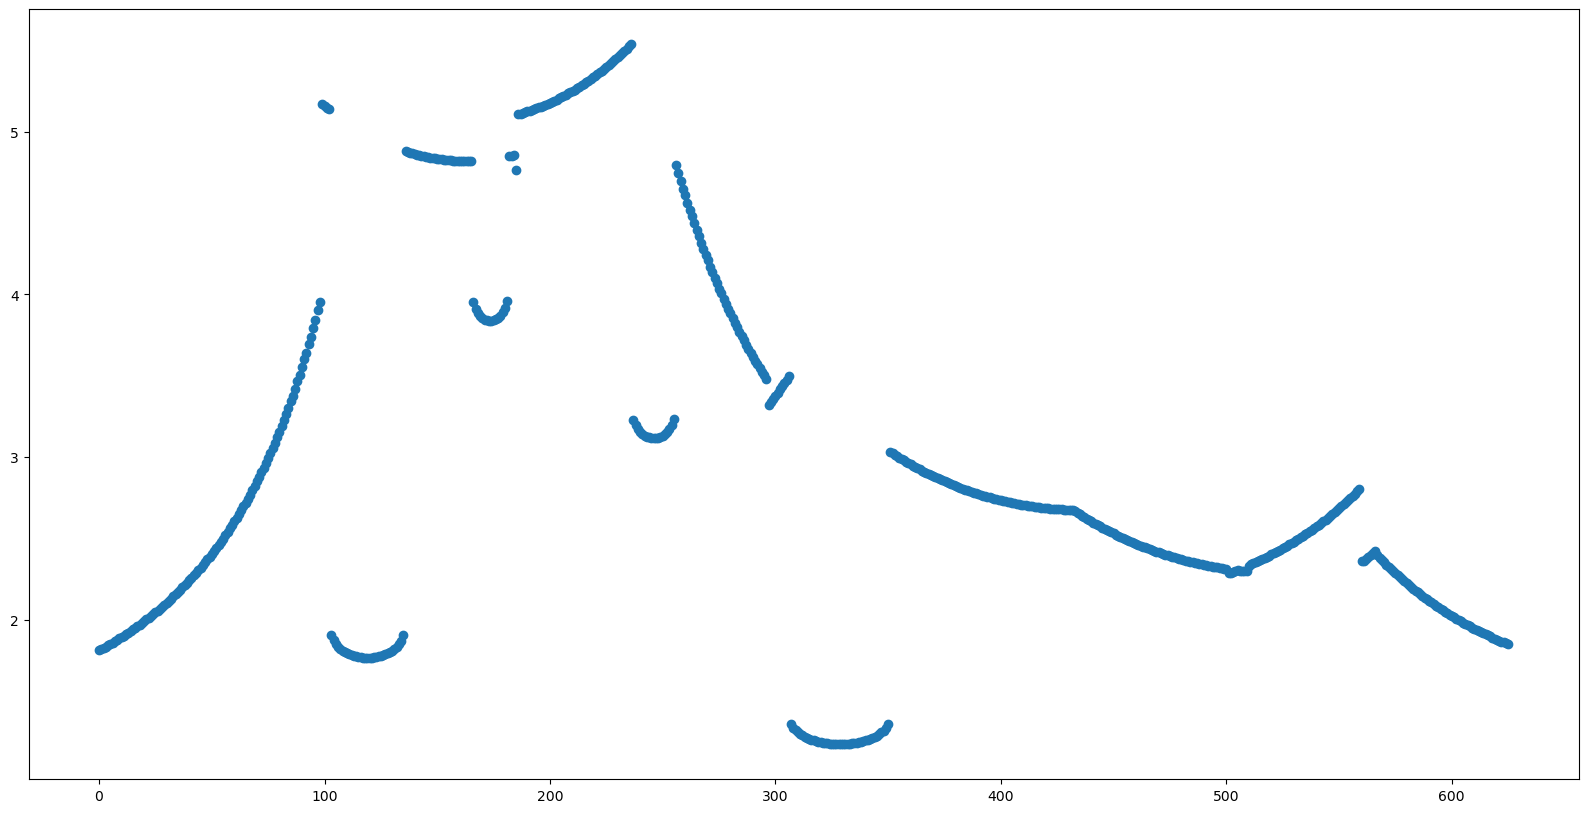

In [1]:
import matplotlib.pyplot as plt
# Inizializza una lista vuota per memorizzare tutti i dati
all_data = []
# Apri il file in modalità lettura
with open('data.txt', 'r') as file:
    # Leggi tutte le righe del file
    lines = file.readlines()

    # Itera attraverso le righe
    for line in lines:
        # Rimuovi il carattere di nuova riga
        line = line.strip()

        # Dividi la riga in una lista di valori
        data = line.split(',')
        # Aggiungi la lista di valori alla lista di tutti i dati
        for i in range(len(data)):
            all_data.append(data[i])

#chek if the data is a string o a number
for i in range(len(all_data)):
    try:
        all_data[i] = float(all_data[i])
    except ValueError:
        print("error in line", i)
        print("invalid data:", all_data[i])
        # delete all_data[i] from the list

#delete the data with '' form all_data
all_data = [x for x in all_data if x != '']

dataCleand = all_data[20:-20]
plt.figure(figsize=(20, 10))
plt.scatter(range(len(dataCleand)),dataCleand)
plt.show()

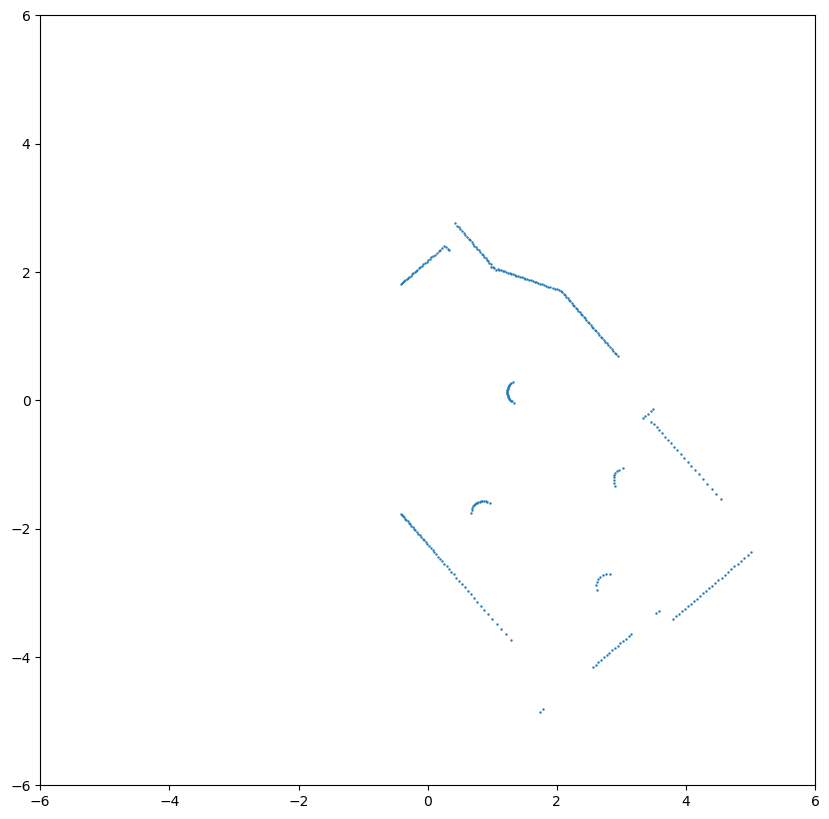

In [6]:
#conveti le coordinate polari in cartesiane
import math
def polarToCartesian(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y

#converti dataCleand in coordinate cartesiane
#crea un lista di punti in coordinate cartesiane
dataCartesianX = []
dataCartesianY = []
incrementoTheta = 0.005774015095084906
theta_iniziale = -1.9198600053787231 + (20*incrementoTheta)
for i in range(0,len(dataCleand),2):
    x,y =polarToCartesian(dataCleand[i],theta_iniziale+(i*incrementoTheta))
    dataCartesianX.append(x)
    dataCartesianY.append(y)
#fix the axis to hava value from -5 to 5

#plot dataCartesian
plt.figure(figsize=(10, 10))
#scatter plot with small dots
plt.scatter(dataCartesianX,dataCartesianY,s=0.5)
# Imposta i limiti degli assi
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [3]:
#smooth data
def smooth_data(dataS, window_size):
    # Crea una lista vuota per memorizzare i dati
    smoothed_data = []
    # Itera attraverso i dati
    for i in range(len(dataS)):
        # Se il dato è troppo vicino al bordo, non è possibile calcolare la media
        if i < window_size or i >= len(dataS) - window_size:
            smoothed_data.append(dataS[i])
        else:
            # Calcola la media dei dati nel range
            total = 0
            for j in range(i - window_size, i + window_size + 1):
                total += dataS[j]
            smoothed_data.append(total / (window_size * 2 + 1)) 
    return smoothed_data

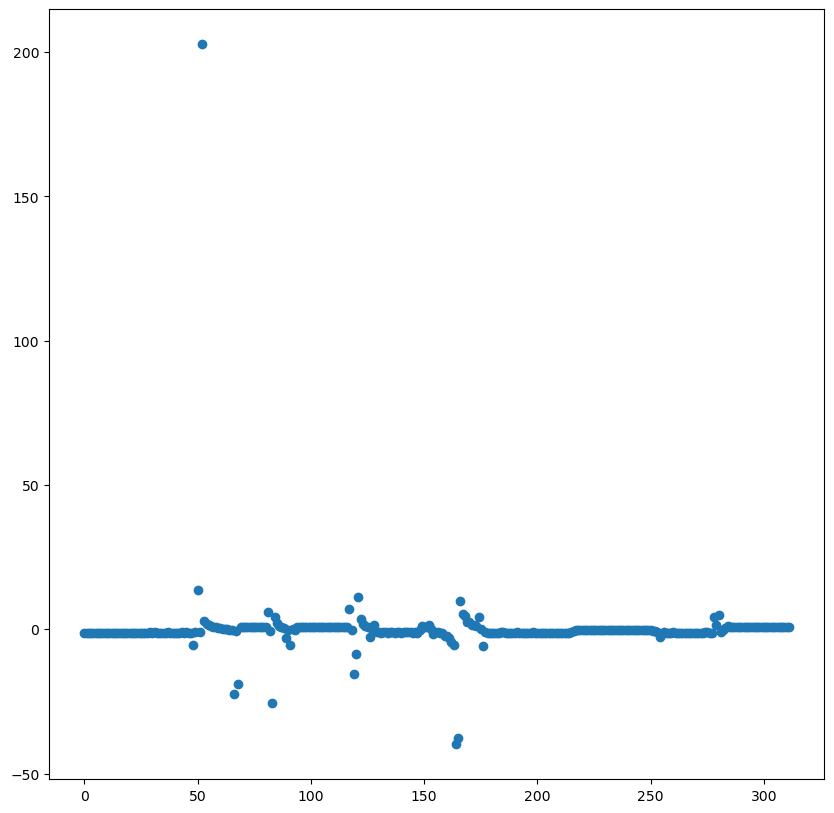

In [4]:

def diff_fin(fxh,fx,h):
    return (fxh-fx)/h

derivateCartesianY =[]
smoothed_data = smooth_data(dataCartesianY, 1)

for i in range(len(smoothed_data)-1):
    derivateCartesianY.append(diff_fin(smoothed_data[i+1],smoothed_data[i],dataCartesianX[i+1]-dataCartesianX[i]))

plt.figure(figsize=(10, 10))
plt.scatter(range(len(derivateCartesianY)),derivateCartesianY)
plt.show()


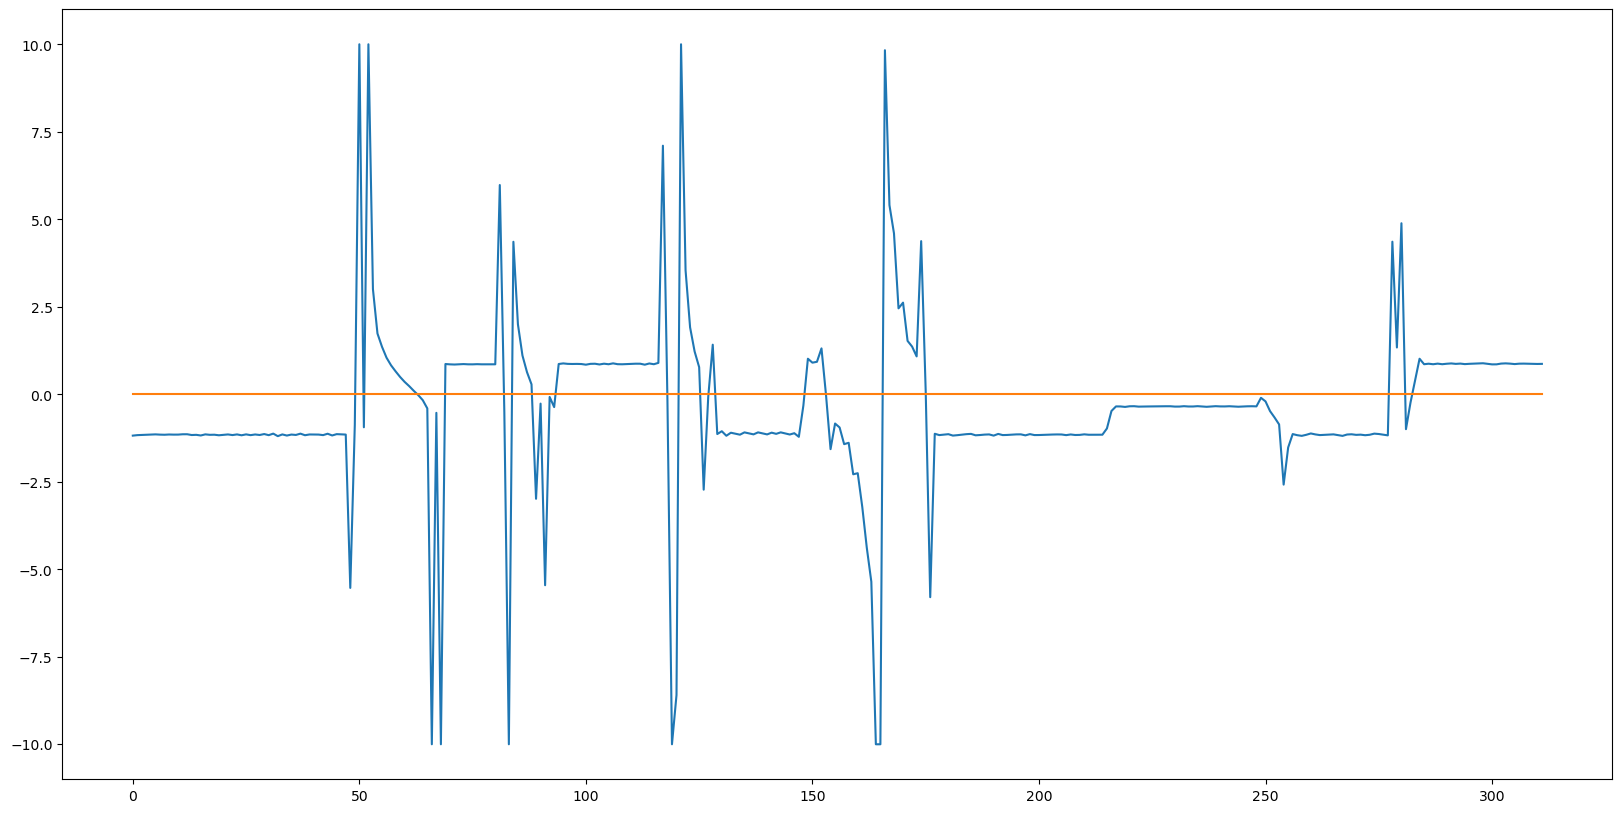

In [5]:
cleanDerivateCartesianY = derivateCartesianY
#abbassa i valri maggiori di 10 a 10 e quelli minori di -10 a -10 in modo da avere una linea più pulita

for i in range(len(cleanDerivateCartesianY)):
    if cleanDerivateCartesianY[i] > 10:
        cleanDerivateCartesianY[i] = 10
    if cleanDerivateCartesianY[i] < -10:
        cleanDerivateCartesianY[i] = -10

plt.figure(figsize=(20, 10))
plt.plot(range(len(cleanDerivateCartesianY)),cleanDerivateCartesianY)
#plot the 0 line
plt.plot(range(len(cleanDerivateCartesianY)),[0]*len(cleanDerivateCartesianY))
plt.show()
